![my picture](https://www.fatalerrors.org/images/blog/c6b544ae87e97d71cb450e434a8818a6.jpg)

- apple width = 6cm
- apple length = 6cm
- apple width = 4cm
- apple length = 8cm

apple : 0

banana : 1

In [36]:
import numpy as np 
import matplotlib.pyplot as plt 

In [37]:
n = 2000
apple_width = np.random.normal(6, 1.5, n)
apple_length = np.random.normal(6, 1.5, n)
banana_width = np.random.normal(4, 1, n)
banana_length = np.random.normal(8, 2, n)

In [38]:
# Unknown Fruit
x_width = 3
x_length = 9

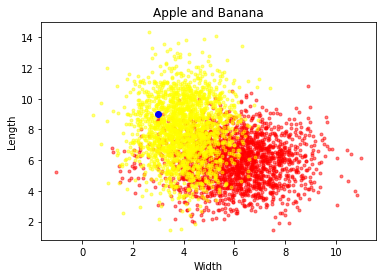

In [39]:
plt.scatter(apple_width, apple_length, c='red', marker='.', alpha=0.5)
plt.scatter(banana_width, banana_length, c='yellow', marker='.', alpha=0.5)

plt.scatter(x_width, x_length, c='blue', marker='o')

plt.title('Apple and Banana')
plt.xlabel('Width')
plt.ylabel('Length')
plt.show()

#### KNN - K Nearest Neighbors

In [40]:
width = np.concatenate((apple_width, banana_width))
length = np.concatenate((apple_length, banana_length))

X_train = np.array([width, length]).T
X_train

array([[6.68009972, 8.72267658],
       [6.03597718, 4.58550911],
       [6.12190586, 5.32019595],
       ...,
       [4.12502501, 9.50909714],
       [5.99951351, 9.17878339],
       [4.52838642, 5.36269758]])

In [41]:
Y_apples = np.zeros(n, dtype='int')
Y_bananas = np.ones(n, dtype='int')

Y_train = np.concatenate((Y_apples, Y_bananas))
Y_train

array([0, 0, 0, ..., 1, 1, 1])

In [42]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [43]:
new_fruit = np.array([5, 7])

distances = []
for x in X_train:
    d = euclidean_distance(new_fruit, x)
    distances.append(d)
    
distances

[2.4063145406099857,
 2.6273589324653024,
 2.020003565739481,
 4.251581275453284,
 1.638381200647596,
 2.4693595257999097,
 1.4772905164185115,
 3.2599113583859953,
 0.709818009734423,
 5.380853481386977,
 1.9108517435725545,
 2.056767317308143,
 2.4008200332254637,
 2.00267447183166,
 4.023597301578545,
 2.7063447002468077,
 0.7768724470081593,
 1.8544748782047245,
 3.9952362250003683,
 1.10650463488592,
 2.7233578000562852,
 0.8910521824846731,
 2.5493904848934483,
 2.4540491625028644,
 1.2998545430247037,
 0.7249140732252736,
 1.2511439164145508,
 4.135611337176136,
 1.783600832058299,
 0.5809248720719802,
 3.2069112043985655,
 0.961182047066259,
 3.610051499905843,
 3.0783522797335743,
 1.7862912827099187,
 2.015986653371184,
 3.339495184080482,
 1.2161716697309632,
 2.1648153342322183,
 1.9685634004143713,
 3.1557513582335877,
 2.4010507394981504,
 1.9267823542933313,
 0.9883851794842696,
 3.2009077392474694,
 1.59708064035725,
 2.0335436499474624,
 1.2287852098627512,
 2.78702032

In [44]:
k = 7

print(np.sort(distances)[:k])
print(np.argsort(distances)[:k])

nearest_neighbors = np.argsort(distances)[:k]

[0.03278396 0.04468689 0.06318506 0.08726744 0.11671027 0.12138477
 0.12509406]
[ 382 1909 2304  288 3553  950 1264]


In [45]:
Y_train[nearest_neighbors]

array([0, 0, 1, 0, 1, 0, 0])

In [46]:
np.bincount(Y_train[nearest_neighbors])

array([5, 2], dtype=int64)

In [47]:
result = np.argmax(np.bincount(Y_train[nearest_neighbors]))
result

0

In [48]:
if result == 0:
    print('🍎')
else:
    print('🍌')

🍎
